In [81]:
import pandas as pd

In [82]:
user_artists = pd.read_csv('user_artists.dat', sep='\t')
user_artists.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [83]:
artists = pd.read_csv('artists.dat', sep='\t')
artists.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717.jpg
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835.png
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013.jpg


In [84]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
#pd.set_option('display.max_colwidth', -1)


In [85]:
# df.rename(str.lower, axis='columns')
# df.rename({1: 2, 2: 4}, axis='index')

artists = artists.rename({'id': 'artistID'}, axis='columns')
artists.head()

,artistID,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717.jpg
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835.png
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013.jpg


In [86]:
user_and_artists = pd.merge(artists, user_artists, on='artistID')
user_and_artists.head()

,artistID,name,url,pictureURL,userID,weight
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,34,212
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,274,483
2,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,785,76
3,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,135,1021
4,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,257,152


In [87]:
user_and_artists.shape

(92834, 6)

In [88]:
user_and_artists = user_and_artists.sort_values(by='userID')
user_and_artists.head()

,artistID,name,url,pictureURL,userID,weight
3903,90,Kosheen,http://www.last.fm/music/Kosheen,http://userserve-ak.last.fm/serve/252/3309551.jpg,2,1471
4096,99,INXS,http://www.last.fm/music/INXS,http://userserve-ak.last.fm/serve/252/26433237.jpg,2,1330
4145,100,ABC,http://www.last.fm/music/ABC,http://userserve-ak.last.fm/serve/252/41596559.png,2,1315
676,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,2,11351
2910,77,George Michael,http://www.last.fm/music/George+Michael,http://userserve-ak.last.fm/serve/252/39849449.png,2,2120


In [89]:
user_and_artists.to_csv('user_and_artists.csv', index=False)

In [90]:
df = pd.read_csv('user_and_artists.csv')
df.head()

,artistID,name,url,pictureURL,userID,weight
0,90,Kosheen,http://www.last.fm/music/Kosheen,http://userserve-ak.last.fm/serve/252/3309551.jpg,2,1471
1,99,INXS,http://www.last.fm/music/INXS,http://userserve-ak.last.fm/serve/252/26433237.jpg,2,1330
2,100,ABC,http://www.last.fm/music/ABC,http://userserve-ak.last.fm/serve/252/41596559.png,2,1315
3,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,2,11351
4,77,George Michael,http://www.last.fm/music/George+Michael,http://userserve-ak.last.fm/serve/252/39849449.png,2,2120


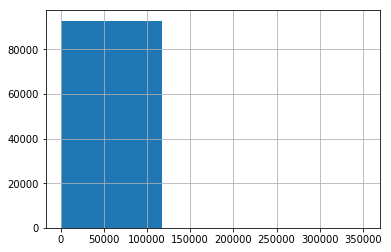

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

user_and_artists['weight'].hist(bins=3)

In [92]:
user_and_artists['weight'].describe()

count    92834.00000 
mean     745.24393   
std      3751.32208  
min      1.00000     
25%      107.00000   
50%      260.00000   
75%      614.00000   
max      352698.00000
Name: weight, dtype: float64

In [93]:
# Here I'm inferring a rating for each artist based on how many times each user listened to them using 'weight'

ratings = []

for row in user_and_artists['weight']:
    if row <=25.0:
        ratings.append(1)
    elif row <= 50.0:
        ratings.append(2)
    elif row <= 107.0:
        ratings.append(3)
    elif row <= 175.0:
        ratings.append(4)
    elif row <= 260.0:
        ratings.append(5)
    elif row <= 400.0:
        ratings.append(6)
    elif row <= 614.0:
        ratings.append(7)
    elif row <= 1000.0:
        ratings.append(8)
    elif row <= 5000.0:
        ratings.append(9)
    else:
        ratings.append(10)
        
user_and_artists['artistRatings'] = ratings
user_and_artists.head()

,artistID,name,url,pictureURL,userID,weight,artistRatings
3903,90,Kosheen,http://www.last.fm/music/Kosheen,http://userserve-ak.last.fm/serve/252/3309551.jpg,2,1471,9
4096,99,INXS,http://www.last.fm/music/INXS,http://userserve-ak.last.fm/serve/252/26433237.jpg,2,1330,9
4145,100,ABC,http://www.last.fm/music/ABC,http://userserve-ak.last.fm/serve/252/41596559.png,2,1315,9
676,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,2,11351,10
2910,77,George Michael,http://www.last.fm/music/George+Michael,http://userserve-ak.last.fm/serve/252/39849449.png,2,2120,9


In [94]:
user_and_artists['artistRatings'].value_counts(normalize=True)

9     0.134746
6     0.132150
4     0.128800
5     0.121324
3     0.120915
7     0.116972
8     0.098261
1     0.074789
2     0.055335
10    0.016707
Name: artistRatings, dtype: float64

### Recommendations based on ratings counts

In [95]:
rating_count = pd.DataFrame(user_and_artists.groupby('name')['artistRatings'].count())
rating_count.sort_values('artistRatings', ascending=False).head()

,artistRatings
name,
Lady Gaga,611
Britney Spears,522
Rihanna,484
The Beatles,480
Katy Perry,473


For the last.fm dataset, the artist that received the most rating counts is Lady Gaga.  Something that binds every artist in this list, with the exception of The Beatles, is that they're all pop singers.

### Recommendations based on correlations

We use Pearson's R correlation coefficient.  First we need to find out the average rating, and the number of ratings each book received.

In [99]:
average_rating = pd.DataFrame(user_and_artists.groupby('name')['artistRatings'].mean())
average_rating.sort_values(by='artistRatings', ascending=False).head(50)

,artistRatings
name,
Betty Boo,10.0
Pig Destroyer,10.0
Au4,10.0
Shannon Noll,10.0
Parque En El Espacio,10.0
Viking Quest,10.0
Axel Fernando,10.0
EMF,10.0
Nikka Costa,10.0


In [100]:
average_rating['ratingCount'] = pd.DataFrame(user_and_artists.groupby('name')['artistRatings'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,artistRatings,ratingCount
name,,
Lady Gaga,6.862520,611
Britney Spears,7.473180,522
Rihanna,6.710744,484
The Beatles,6.587500,480
Katy Perry,6.583510,473


In this dataset, the artist that received the most rating counts was not highly rated at all.  As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here.  So we need a better system.

### Ratings Matrix

We convert the ratings table to a 2D matrix.  The matrix will be sparse because not every user rated every artist.

In [101]:
user_and_artists.head()

,artistID,name,url,pictureURL,userID,weight,artistRatings
3903,90,Kosheen,http://www.last.fm/music/Kosheen,http://userserve-ak.last.fm/serve/252/3309551.jpg,2,1471,9
4096,99,INXS,http://www.last.fm/music/INXS,http://userserve-ak.last.fm/serve/252/26433237.jpg,2,1330,9
4145,100,ABC,http://www.last.fm/music/ABC,http://userserve-ak.last.fm/serve/252/41596559.png,2,1315,9
676,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,2,11351,10
2910,77,George Michael,http://www.last.fm/music/George+Michael,http://userserve-ak.last.fm/serve/252/39849449.png,2,2120,9


In [102]:
# This is the core of the correlation method

user_and_artists_pivot = user_and_artists.pivot(index='userID', columns='name').artistRatings
userID = user_and_artists_pivot.index
name = user_and_artists_pivot.columns
print(user_and_artists_pivot.shape)
user_and_artists_pivot.head()

(1892, 17632)


name,!!!,!DISTAIN,!deladap,#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,(We Are) Performance,(hed) Planet Earth,(sic)monic,*NSYNC,+44,+\-,-123 min.,-OZ-,-t de sangre,...And The Earth Swarmed With Them,...And You Will Know Us by the Trail of Dead,.38 Special,.crrust,06 Children Of The Cross,08001,1-800-ZOMBIE,10 Years,10-20 БЕЗ ВЫХОДНЫХ,100 Bitches,1000names,100DEADRABBITS!!!,100blumen,100dBs,10cc,11.43,110,112,1125,12 Rounds,12 Stones,120 Days,1200 Micrograms,12012,127 Band,129- FLY PROJECT & TOM BOXER & ANCA PARGHEL,12th Planet,13,1349,13th Floor Elevators,14 Bis,14 Year Old Girls,16 Horsepower,16Volt,16bit,18th Dye,19,1910 Fruitgum Company,1974 AD,1990s,1994!,1997,1SaGain,2 0' Clock Girlfriend,2 Brothers on the 4th Floor,2 Many DJ's,2 Skinnee J's,2 Times Terror,2 Unlimited,2 Гига Любви,2002,2009 Broadway Revival Cast,2009 Names in Vain,21 hertz,213,25 LAT LISTY PRZEBOJÓW TRÓJKI,2562,2AM,2AM Club,2Face Idibia,2H Company,2NE1,2PM,2Pac,2gether,2nd II None,2ois,2up,3,3 Doors Down,3 Inches of Blood,3 Segundos Antes da Queda,3 dueños,3 na Massa,3-11 Porter,30 Seconds to Mars,311,32Crash,33Miles,36 Crazyfists,38th Parallel,3D,3Moonboys,3OH!3,3Tops,3mmey,3rd Bass,4 Non Blondes,4 Strings,40 Below Summer,40 Glocc,40 Winks,40 УКВ,40 градусов,45 Grave,4LYN,4TOPS,4Taste,4Tops & KAT-TUN,4chan,4hero,4minute,4ре Апреля,5'nizza,50 Cent,50 Cent Ft. Justin Ft. Timbaland,"50 Cent, Eminem, Ca$his & Lloyd Banks",50 Lions,50 kreon 50,500won Project,501,5F-X,5ive,5ivesta Family,6.Cadde,60 minut na godzinę,6000000000 себя,64revolt,65daysofstatic,69 enfermos,7 Days Away,7 Skies,7 Year Bitch,7000$,78violet,7Seconds,7and5,7he Myriads,7th Floor,7Б,7раса,8 Bit Instrumental,8 Bit Weapon,8 Femmes,808 State,80kidz,883,8Ball & MJG,8[bit]chyfruit,8mm,8th,8u,8°6 Crew,98 Degrees,999,9GOATS BLACK OUT,9th Wonder,9th Wonder & Buckshot,:(,:wumpscut:,A,A Band Featuring Instruments,A Black Rose Burial,A Bullet for Pretty Boy,A Camp,A Challenge of Honour,A Change of Pace,A Cursive Memory,A Day to Remember,A Dos Velas,A Fine Frenzy,A Flock of Seagulls,A Forest Mighty Black,A Hawk and a Hacksaw,A Hero A Fake,A Hope For Home,A Kid Hereafter,A Life Once Lost,A Lily,A Loss For Words,A Midsky Surrender,A Palo Seko,A Perfect Circle,A Place to Bury Strangers,A Plea for Purging,A Radio With Guts,A Rocket to the Moon,A Silent Film,A Silver Mt. Zion,A Skylit Drive,A Smile from the Trenches,A Song For You My Dear,A Static Lullaby,A Sunny Day in Glasgow,A Thorn for Every Heart,A Tribe Called Quest,A Very Potter Musical,A Very Potter Sequel Cast,A Vida Azul,A Weather,A Wilhelm Scream,A*Teens,A-Alikes,A-Ha - www.power-portal.to,A-Part,A-Team,A-Trak,A.A. Bondy,A.C. Newman,A.C.T,A.D.D.,A.E,A.F.I.,A.J.K.S.,A.M. Architect,A.R. Rahman,A.S.A.P.,A//Political,A1,A1 Bassline,A7ie,AAA,AB/CD,ABACABB,ABBA,ABC,ABC News,ABC Radio National,AC,AC/DC,ACIDMAN,ADULT.,AEVEMI,AFFLUENTE,AFI,AFTA-1,AFX,AI,AJ McLean,AKADO,AKB48,AL Hammer,...,ハートレス,パール兄弟,フェイト・テスタロッサ,ブラック・キャッツ,ブルー・エンジェル,ブローディア,ポルノグラフィティ,マキシマム ザ ホルモン,ミドリ,ムック,メトロノーム,メロン記念日,モンゴル800,モーニング娘。,ランカ・リー＝中島愛,リア・ディゾン,ルルティア,レミオロメン,ヴァルナ,七瀬光,三船 浩／キング男声合唱団,上田雅美,下川みくに,下村陽子,中島美嘉,中澤裕子,串田アキラ,久石譲,今井翼,仲野順也,伊福部昭,伊藤由奈,伍佰,佐宗綾子,佐藤ひろ美,倉木麻衣,倖田來未,元ちとせ,光田康典,八神 はやて,凛として時雨,分島花音,初音ミク,劉德華,北出菜奈,吳雨霏,周杰倫,周華健,和田光司,和田薫,土屋アンナ,坂本真綾,坂本美雨,坂本龍一,堀山俊彦,堀江由衣,境亜寿香,増田俊郎,夏川りみ,夢中夢,大塚愛,大沢誉志幸,大谷幸,天空のエスカフローネ,天野月子,天門,奥井雅美,妖精帝國,姫神,孫燕姿,宇多田ヒカル,安倍なつみ,安室奈美恵,安良城紅,害意,少女-ロリヰタ-23区,山下智久,岡本玲,岩代太郎,岩垂徳行,岩崎琢,島みやえい子,島谷ひとみ,崎元仁,嵐,嶺川貴子,川井憲次,川田まみ,工藤静香,平井堅,平原綾香,平成維新,平沢進,平澤創,平野綾,平野義久,張震嶽,彩菜,彩音,後藤真希,徐懷鈺,志方あきこ,惘闻,愛狂います。,摩天楼オペラ,放課後ティータイム,斉藤和義,新宿ゲバルト,月島きらり starring 久住小春(モーニング娘。),有澤孝紀,有里知花,木村カエラ,木村明美,李玟,杏里,東京事変,東方神起,松たか子,松尾清憲,松枝賀子 & 江口貴勅,松浦亜弥,林俊傑,林原めぐみ,林海,栗林みな実,核P-MODEL,桜庭統,梅林茂,梶浦由記,梶芽衣子,植松伸夫,椎名林檎,椎名林檎×斎藤ネコ,楊千嬅,樹海,水樹奈々,氷室京介,河村隆一,河野伸,浜口史郎,浜崎あゆみ,浜渦正志,浜田麻里,清春,湯川潮音,滝沢秀明,玉置成実,王力宏,王若琳,王菲,田村ゆかり,盧巧音,相川七瀬,真理絵,矢井田瞳,石井妥師,石川智晶,福井舞,福原美穂,笹川美和,米倉千尋,細江慎治,絢香,羅志祥,美勇伝,美少女戦士セーラームーンシリーズ,羽毛田丈史,芸能山城組,茅原実里,莫文蔚,菅野よう子,菅野祐悟,蔡依林,蕭亞軒,藤本美貴,西野カナ,詩月カオリ,譚盾,近藤嶺,近藤浩治,郭采洁,鈴木あみ,鈴木亜美,钟茌 Zhongchi,闇の末裔,陰陽座,陳奕迅,雅-MIYAVI-,電気グルーヴ,青山テルマ,高円寺

Let's find out which artists are correlated with Katy Perry.  

In [103]:
katy_ratings = user_and_artists_pivot['Katy Perry']
similar_to_katy = user_and_artists_pivot.corrwith(katy_ratings)
corr_katy = pd.DataFrame(similar_to_katy, columns=['pearson'])
corr_katy.dropna(inplace=True)
corr_katy.head()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearson
name,
*NSYNC,0.390417
+44,0.969925
12 Stones,0.500000
2NE1,0.530628
2PM,0.833333


In [104]:
corr_katy.head(10)

,pearson
name,
*NSYNC,0.390417
+44,0.969925
12 Stones,0.500000
2NE1,0.530628
2PM,0.833333
2Pac,0.979864
2ois,1.000000
3 Doors Down,0.556157
30 Seconds to Mars,0.532736


In [105]:
corr_summary = corr_katy.join(average_rating['ratingCount'])
corr_summary.head(10)

,pearson,ratingCount
name,,
*NSYNC,0.390417,29
+44,0.969925,18
12 Stones,0.500000,15
2NE1,0.530628,23
2PM,0.833333,8
2Pac,0.979864,30
2ois,1.000000,5
3 Doors Down,0.556157,55
30 Seconds to Mars,0.532736,216


### How accurate are our results for Katy Perry?

In [106]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/KlyXNRrsk4A" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [107]:
# NSYNC

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Eo-KmOd3i7s" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [108]:
# 2NE1 (K-Pop)

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/j7_lSP8Vc3o" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#### But then correlation also recommended 2Pac for Katy Perry, so it might not be such a good recommender system after all.

In [109]:
pwd

'/Volumes/Seagate Backup Plus Drive/hetrec2011-lastfm-2k'

In [ ]:
user_and_artists